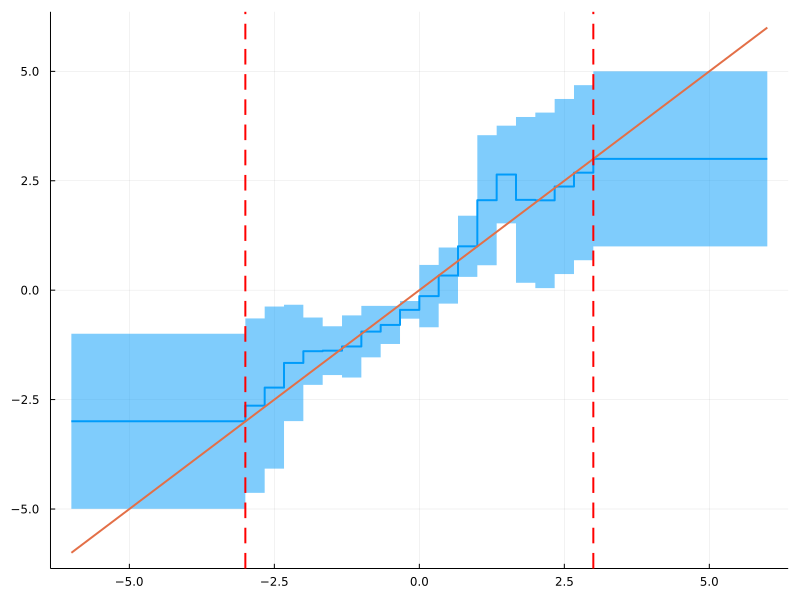

In [8]:
using Plots, StatsPlots
include("src/SFGP_bayesreg-learnable.jl")
using Flux
using StatsBase
using CSV, DataFrames
using ScikitLearn
using KnetMetrics
using Tables


df = Matrix(CSV.File("./data/boston_housing.csv") |> DataFrame)
X = Matrix(transpose(df[:,1:end-1]))
y = Matrix(transpose(df[:,end:end]))



import Random
Random.seed!(321)


Xm = mean(X,dims=2)
Xs = std(X,dims=2)
sfgp = SFGP(SVGP((X[:,1:10] .- Xm)./Xs),20,3)

params = Flux.params(sfgp)
opt = ADAM(0.05)

Xtrain = X

mean_train = mean(Xtrain,dims=2)
std_train = std(Xtrain,dims=2)
Xtrain = (Xtrain.-mean_train) ./ std_train

Xtest = X
Xtest = (Xtest.-mean_train) ./ std_train

ytrain = y
ytest = y
mean_ytrain = mean(ytrain)
std_ytrain = std(ytrain)
ytrain = (ytrain.-mean_ytrain)./std_ytrain
ytest = (ytest.-mean_ytrain)./std_ytrain

for i in 1:350
    grads = Zygote.gradient(() -> sample_elbo(sfgp,Xtrain,ytrain),params)
    Flux.Optimise.update!(opt,params,grads)
end
    
  

plot(vcat(-6,sfgp.upper[1:end-1],6),vcat(sfgp.vals_varmean[1],sfgp.vals_varmean),legend=:none, linetype=:steppre,size=(800,600),lw=2,fmt=:png,ribbon=2 .* vcat(sfgp.vals_varstd[1],sfgp.vals_varstd))

plot!(collect(-6:0.1:6),(collect(-6:0.1:6)),lw=2)
vline!([-3,3],color=:red,s=:dash,lw=2)

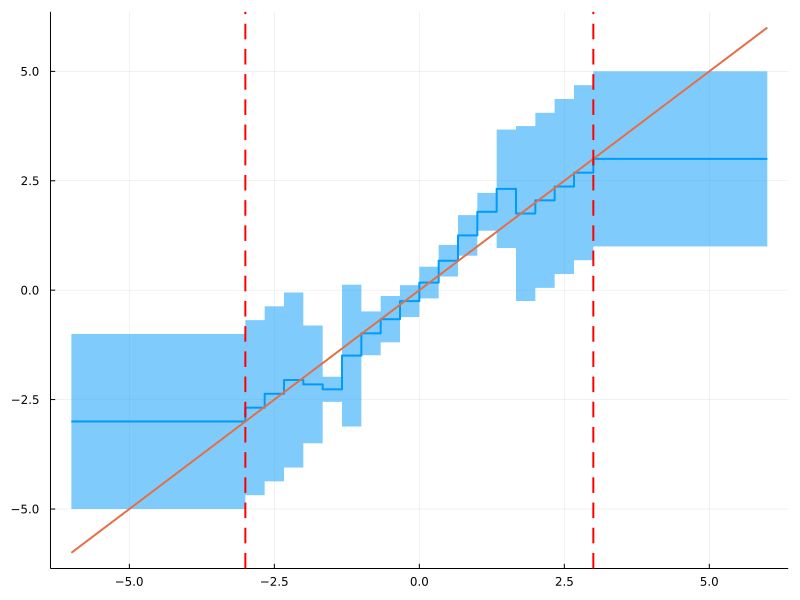

In [7]:
df = Matrix(CSV.File("./data/concrete.csv") |> DataFrame)
X = Matrix(transpose(df[:,2:end-1]))
y = Matrix(transpose(df[:,end:end]))



import Random
Random.seed!(321)


Xm = mean(X,dims=2)
Xs = std(X,dims=2)
sfgp = SFGP(SVGP((X[:,1:10] .- Xm)./Xs),20,3)

params = Flux.params(sfgp)
opt = ADAM(0.05)

Xtrain = X

mean_train = mean(Xtrain,dims=2)
std_train = std(Xtrain,dims=2)
Xtrain = (Xtrain.-mean_train) ./ std_train

Xtest = X
Xtest = (Xtest.-mean_train) ./ std_train

ytrain = y
ytest = y
mean_ytrain = mean(ytrain)
std_ytrain = std(ytrain)
ytrain = (ytrain.-mean_ytrain)./std_ytrain
ytest = (ytest.-mean_ytrain)./std_ytrain

for i in 1:350
    grads = Zygote.gradient(() -> sample_elbo(sfgp,Xtrain,ytrain),params)
    Flux.Optimise.update!(opt,params,grads)
end
    
  

plot(vcat(-6,sfgp.upper[1:end-1],6),vcat(sfgp.vals_varmean[1],sfgp.vals_varmean),legend=:none, linetype=:steppre,size=(800,600),lw=2,fmt=:png,ribbon=2 .* vcat(sfgp.vals_varstd[1],sfgp.vals_varstd))

plot!(collect(-6:0.1:6),(collect(-6:0.1:6)),lw=2)
vline!([-3,3],color=:red,s=:dash,lw=2)